# PACKAGES

## Install packages

In [1]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib

## Import packages

In [2]:
%matplotlib inline
import pylab
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

pylab.rcParams.update({'font.size': 14})

# DATA

## Load data

Use a filepath like this for Macintosh computers

In [3]:
df = pd.read_csv('AnomalyData.csv')

Check the first few lines of data.

In [4]:
df.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


Save state_code to label outliers. "data" contains just quantitative variables.

In [17]:
# Get state_code value
state_code = df["state_code"]
data = df.loc[:, "data science": "Openness"]
'''
Location all rows value and columns from Data science to Openness
'''

'\nLocation all rows value and columns from Data science to Openness\n'

In [18]:
state_code

0     AL
1     AZ
2     AR
3     CA
4     CO
5     CT
6     DE
7     FL
8     GA
9     ID
10    IL
11    IN
12    IA
13    KS
14    KY
15    LA
16    ME
17    MD
18    MA
19    MI
20    MN
21    MS
22    MO
23    MT
24    NE
25    NV
26    NH
27    NJ
28    NM
29    NY
30    NC
31    ND
32    OH
33    OK
34    OR
35    PA
36    RI
37    SC
38    SD
39    TN
40    TX
41    UT
42    VT
43    VA
44    WA
45    WV
46    WI
47    WY
Name: state_code, dtype: object

# ANALYSIS

## Univariate Outliers

Create a box plot to display univariate outliers on "modern dance."

In [19]:
param = 'modern dance'

Get quantile values and IQR for outlier limits.

In [20]:
qv1 = data[param].quantile(0.25)
qv2 = data[param].quantile(0.5)
qv3 = data[param].quantile(0.75)
qv_limit = 1.5 * (qv3 - qv1)

Get positions of outliers and use state_code for labels.

In [21]:
un_outliers_mask = (data[param] > qv3 + qv_limit) | (data[param] < qv1 - qv_limit)
un_outliers_data = data[param][un_outliers_mask]
un_outliers_name = state_code[un_outliers_mask]

Create box plot for 'modern dance.'

Text(0, 0.5, 'modern dance')

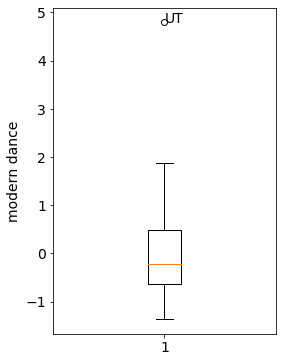

In [22]:
fig = pylab.figure(figsize=(4, 6))
ax = fig.add_subplot(1, 1, 1)
for name, y in zip(un_outliers_name, un_outliers_data):
    ax.text(1, y, name)
ax.boxplot(data[param])
ax.set_ylabel(param)

# Bivariate Outliers

Create a scatterplot with an ellipse as a boundary for outliers.

Use the Google search terms "data science" and "ceo" for this example.

In [23]:
params = ["data science", "ceo"]

In [24]:
params_data = np.array([df[params[0]], df[params[1]]]).T

In [27]:
params_data

array([[-1.  , -0.73],
       [-0.42,  0.25],
       [-0.66, -0.66],
       [ 1.95,  1.27],
       [ 0.34,  0.33],
       [ 0.69,  1.52],
       [ 0.45,  0.91],
       [-0.73,  0.36],
       [-0.27,  0.42],
       [-0.67, -0.59],
       [ 0.87,  1.21],
       [ 0.01, -0.02],
       [-0.26, -0.65],
       [-0.73, -0.66],
       [-0.65, -0.72],
       [-1.08, -1.13],
       [-0.79, -0.81],
       [ 2.  ,  0.8 ],
       [ 2.73,  2.41],
       [-0.18, -0.14],
       [ 0.16,  0.63],
       [-1.27, -1.38],
       [-0.47, -0.28],
       [-0.91, -0.89],
       [-0.12, -0.39],
       [-0.64,  0.25],
       [-0.16,  0.42],
       [ 1.42,  1.48],
       [-0.39, -1.12],
       [ 2.03,  2.46],
       [ 0.25,  0.2 ],
       [-1.26, -1.02],
       [-0.21,  0.06],
       [-0.79, -0.49],
       [-0.06, -0.85],
       [ 0.35,  0.68],
       [ 1.34,  0.42],
       [-0.59, -0.53],
       [-0.64, -1.24],
       [-0.47, -0.09],
       [-0.18, -0.06],
       [ 0.36,  0.09],
       [-0.04, -0.33],
       [ 0.

Compute the "elliptical envelope"

In [25]:
ee = EllipticEnvelope()
ee.fit(params_data)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

In [28]:
ee

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

Get the names and positions of outliers.

In [26]:
biv_outliers_mask = ee.predict(params_data) == -1
biv_outliers_data = params_data[biv_outliers_mask]
biv_outliers_name = state_code[biv_outliers_mask]

Calculate the decision boundary for the scatterplot

In [29]:
xx, yy = np.meshgrid(np.linspace(params_data[:,0].min(), params_data[:,0].max(), 100),
                    np.linspace(params_data[:, 1].min(), params_data[:,1].max(), 100))
zz = ee.decision_function(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

Draw the scatterplot with the elliptical envelop and label the outliers

In [ ]:
fig = pylab.figure(figsize)